In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_raw = pd.read_csv(r"C:\Users\nstow\Desktop\Datasets\Melbourne_housing_FULL.csv")
df = df_raw

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [4]:
df_raw.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
df_raw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [8]:
df = df.drop(columns = ['Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude'])

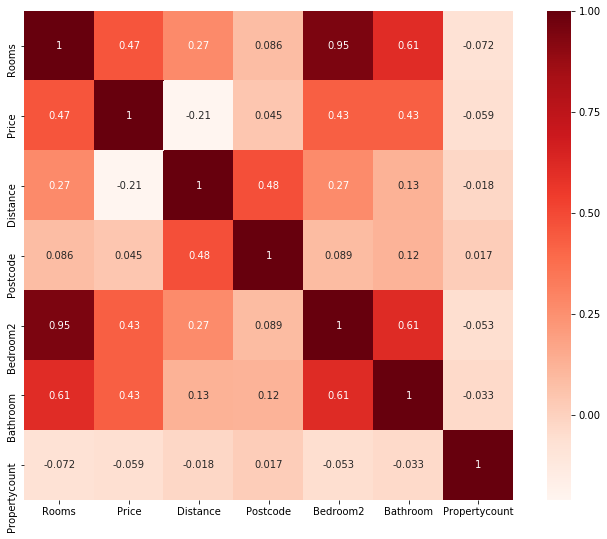

In [9]:
corrmat = df.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True, cmap="Reds", annot = True)
plt.show()

In [10]:
df = df.drop(columns = 'Bedroom2')

In [11]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [12]:
df['house'] = np.where(df['Type'] == 'h', 1, 0)
df['townhouse'] = np.where(df['Type'] == 't', 1 ,0)
df['other'] = np.where(df['Type'] == 'u', 1, 0)

df = df.drop(columns = 'Type')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 15 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bathroom         26631 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
house            34857 non-null int32
townhouse        34857 non-null int32
other            34857 non-null int32
dtypes: float64(5), int32(3), int64(1), object(6)
memory usage: 3.6+ MB


In [14]:
df = df.drop(columns = ['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Regionname']) 

In [15]:
df = df.dropna()

In [18]:
linRegress = LinearRegression()
X = df.drop(columns = 'Price')
y = df['Price']

## Fit the model.
fit = linRegress.fit(X, y)

In [19]:
print('R-squared value: ', linRegress.score(X, y))

R-squared value:  0.46200369520804296


In [20]:
print(cross_val_score(linRegress, X, y, cv=5))

[0.52654257 0.48458267 0.41171608 0.41714115 0.37592983]


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 1 to 34856
Data columns (total 9 columns):
Rooms            20800 non-null int64
Price            20800 non-null float64
Distance         20800 non-null float64
Postcode         20800 non-null float64
Bathroom         20800 non-null float64
Propertycount    20800 non-null float64
house            20800 non-null int32
townhouse        20800 non-null int32
other            20800 non-null int32
dtypes: float64(5), int32(3), int64(1)
memory usage: 1.3 MB


In [22]:
linRegress = LinearRegression()
X = df.drop(columns = ['Price', 'Rooms'])
y = df['Price']

## Fit the model.
fit = linRegress.fit(X, y)

In [23]:
print('R-squared value: ', linRegress.score(X, y))

R-squared value:  0.42538932656750295


In [25]:
linRegress = LinearRegression()
X = df.drop(columns = ['Price', 'Distance'])
y = df['Price']

## Fit the model.
fit = linRegress.fit(X, y)

In [26]:
print('R-squared value: ', linRegress.score(X, y))

R-squared value:  0.2677560549687875


In [29]:
linRegress = LinearRegression()
X = df.drop(columns = ['Price', 'Postcode'])
y = df['Price']

## Fit the model.
fit = linRegress.fit(X, y)

In [30]:
print('R-squared value: ', linRegress.score(X, y))

R-squared value:  0.41847276077510864


In [31]:
linRegress = LinearRegression()
X = df.drop(columns = ['Price', 'Bathroom'])
y = df['Price']

## Fit the model.
fit = linRegress.fit(X, y)

In [32]:
print('R-squared value: ', linRegress.score(X, y))

R-squared value:  0.4254041032486092


In [33]:
linRegress = LinearRegression()
X = df.drop(columns = ['Price', 'Propertycount'])
y = df['Price']

## Fit the model.
fit = linRegress.fit(X, y)

In [34]:
print('R-squared value: ', linRegress.score(X, y))

R-squared value:  0.4617562594374609


In [35]:
linRegress = LinearRegression()
X = df.drop(columns = ['Price', 'house'])
y = df['Price']

## Fit the model.
fit = linRegress.fit(X, y)

In [36]:
print('R-squared value: ', linRegress.score(X, y))

R-squared value:  0.46200369520804296


In [37]:
linRegress = LinearRegression()
X = df.drop(columns = ['Price', 'townhouse'])
y = df['Price']

## Fit the model.
fit = linRegress.fit(X, y)

In [38]:
print('R-squared value: ', linRegress.score(X, y))

R-squared value:  0.46200369520804296


In [39]:
linRegress = LinearRegression()
X = df.drop(columns = ['Price', 'other'])
y = df['Price']

## Fit the model.
fit = linRegress.fit(X, y)

In [40]:
print('R-squared value: ', linRegress.score(X, y))

R-squared value:  0.46200369520804296


In [41]:
linRegress = LinearRegression()
X = df.drop(columns = ['Price', 'Propertycount', 'house', 'townhouse','other'])
y = df['Price']

## Fit the model.
fit = linRegress.fit(X, y)

In [42]:
print('R-squared value: ', linRegress.score(X, y))

R-squared value:  0.41094229632341084
